Checking if Monte Carlo integration is an issue

In [1]:
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, os.path.abspath(".."))

import open_cp.retrohotspot
import open_cp.data
import open_cp.predictors
import open_cp.evaluation

np.random.seed(1)

In [14]:
# Number of data points to generate
n = 1000

# Generate n different float64's from 0 to 365
times = np.random.random(n) * 365

# Rescale float64's into #seconds instead of #days
times = times * (np.timedelta64(1, "D") / np.timedelta64(1, "s")) * np.timedelta64(1, "s")

# Take those date+times, place them within the year 2017, and sort them
times = np.sort(np.datetime64("2017-01-01") + times)

# Generate n different xy pairs, each a float64 from 0 to 1000
locs = np.random.random((2,n)) * 1000

# Combine times and locs as TimedPoints object
points = open_cp.data.TimedPoints(times, locs)

# Create "mask" of 100x100 instances of False
mask = [[False]*100]*100

# Create MaskedGrid, using the mask we just made, with cells of size 10x10 and origin of 0,0
grid = open_cp.data.MaskedGrid(10, 10, 0, 0, mask)

In [15]:
# Create predictor of type RetroHotSpot, supply it with TimedPoints data
predictor = open_cp.retrohotspot.RetroHotSpot()
predictor.data = points

# Set the weight function to be TruncatedGaussian, bandwidth 100, stdev 10
predictor.weight = open_cp.retrohotspot.TruncatedGaussian(100, 10)

# Generate prediction, using data up until Oct 1
cts_pred = predictor.predict(end_time=np.datetime64("2017-10-01"))

# Set prediction's sample rate to 5
cts_pred.samples = 5

# Generate GridPredictionArray from that prediction and with the MaskedGrid we made earlier
pred = open_cp.predictors.GridPredictionArray.from_continuous_prediction_grid(cts_pred, grid)

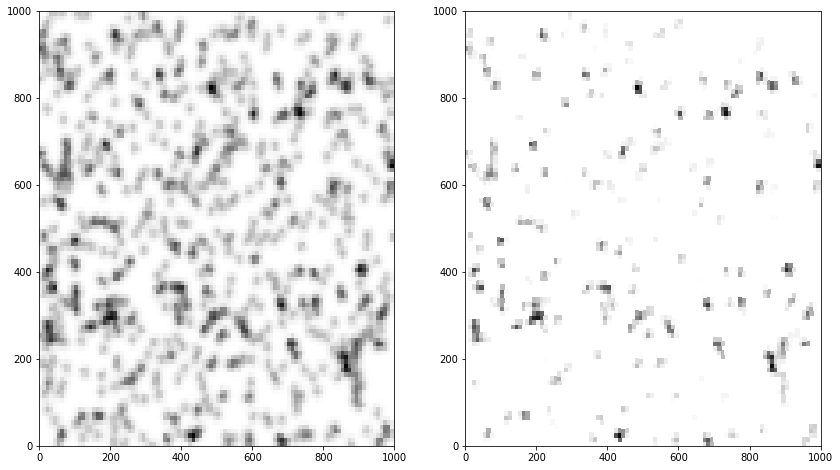

In [16]:
# Plot output

fig, ax = plt.subplots(ncols=2, figsize=(14,8))

ax[0].pcolor(*pred.mesh_data(), pred.intensity_matrix, cmap="Greys")
p = open_cp.evaluation.top_slice_prediction(pred, 0.1)
ax[1].pcolor(*p.mesh_data(), p.intensity_matrix, cmap="Greys")